# **Financial Data Project**

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [ ]:
#!pip install git+https://github.com/pydata/pandas-datareader.git

In [ ]:
#please use this to download all the module which will be used here 
!wget https://raw.githubusercontent.com/gmashik/financial_data_project/master/my_utils.py

In [2]:
from pandas_datareader import data, wb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import datetime
from datetime import date
import pandas as pd
import numpy as np
from plotly import __version__
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot
from my_utils import *
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Download and load the data

In this section we will use pandas to directly read data from Google finance !
First we need to start with the proper imports.We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo
We've used [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) data loading instructions.

In [3]:
from datetime import datetime
start = datetime(2000, 1, 1)
end = datetime(2020, 7, 31)

In [4]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)
# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)
# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)
# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)
# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)
# Apple
APPL = data.DataReader("AAPL", 'yahoo', start, end)

In [5]:
BAC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5178 entries, 2000-01-03 to 2020-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5178 non-null   float64
 1   Low        5178 non-null   float64
 2   Open       5178 non-null   float64
 3   Close      5178 non-null   float64
 4   Volume     5178 non-null   float64
 5   Adj Close  5178 non-null   float64
dtypes: float64(6)
memory usage: 283.2 KB


In [6]:
keys = ['BAC', 'C', 'GS', 'JPM', 'MS', 'APPLE']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, APPL],axis=1,keys=keys)

In [7]:
bank_stocks

BAC             ...        APPLE            
                 High        Low  ...       Volume   Adj Close
Date                              ...                         
2000-01-03  25.125000  24.000000  ...  535796800.0    0.863657
2000-01-04  23.968750  22.468750  ...  512377600.0    0.790842
2000-01-05  23.218750  22.250000  ...  778321600.0    0.802415
2000-01-06  25.000000  23.375000  ...  767972800.0    0.732975
2000-01-07  24.812500  24.000000  ...  460734400.0    0.767695
...               ...        ...  ...          ...         ...
2020-07-27  24.270000  23.879999  ...  121214000.0   94.639359
2020-07-28  24.559999  24.080000  ...  103625600.0   93.084671
2020-07-29  25.290001  24.190001  ...   90329200.0   94.868950
2020-07-30  24.950001  24.350000  ...  158130000.0   96.016884
2020-07-31  24.950001  24.459999  ...  374336800.0  106.068756

[5178 rows x 36 columns]

In [8]:
bank_stocks.columns.names = ['Institute Name','Stock Info']

In [9]:
bank_stocks

Institute Name        BAC             ...        APPLE            
Stock Info           High        Low  ...       Volume   Adj Close
Date                                  ...                         
2000-01-03      25.125000  24.000000  ...  535796800.0    0.863657
2000-01-04      23.968750  22.468750  ...  512377600.0    0.790842
2000-01-05      23.218750  22.250000  ...  778321600.0    0.802415
2000-01-06      25.000000  23.375000  ...  767972800.0    0.732975
2000-01-07      24.812500  24.000000  ...  460734400.0    0.767695
...                   ...        ...  ...          ...         ...
2020-07-27      24.270000  23.879999  ...  121214000.0   94.639359
2020-07-28      24.559999  24.080000  ...  103625600.0   93.084671
2020-07-29      25.290001  24.190001  ...   90329200.0   94.868950
2020-07-30      24.950001  24.350000  ...  158130000.0   96.016884
2020-07-31      24.950001  24.459999  ...  374336800.0  106.068756

[5178 rows x 36 columns]

# **Exploratory Data Anlysis**

**What is the max Close price for each bank's stock throughout the time period?**

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Institute Name
BAC       54.900002
C        588.750000
GS       273.380005
JPM      141.089996
MS       109.375000
APPLE    106.260002
dtype: float64

In [11]:
returns=pd.DataFrame()

In [12]:
for name in keys:
  returns[name+" Return"]=bank_stocks[name]['Close'].pct_change()

In [13]:
returns.tail()

BAC Return  C Return  ...  MS Return  APPLE Return
Date                              ...                         
2020-07-27   -0.008624 -0.007354  ...   0.022718      0.023700
2020-07-28    0.009114 -0.000390  ...  -0.020655     -0.016428
2020-07-29    0.037356  0.024381  ...   0.006566      0.019168
2020-07-30   -0.017016 -0.031417  ...  -0.032417      0.012100
2020-07-31    0.001610 -0.016906  ...  -0.001430      0.104689

[5 rows x 6 columns]

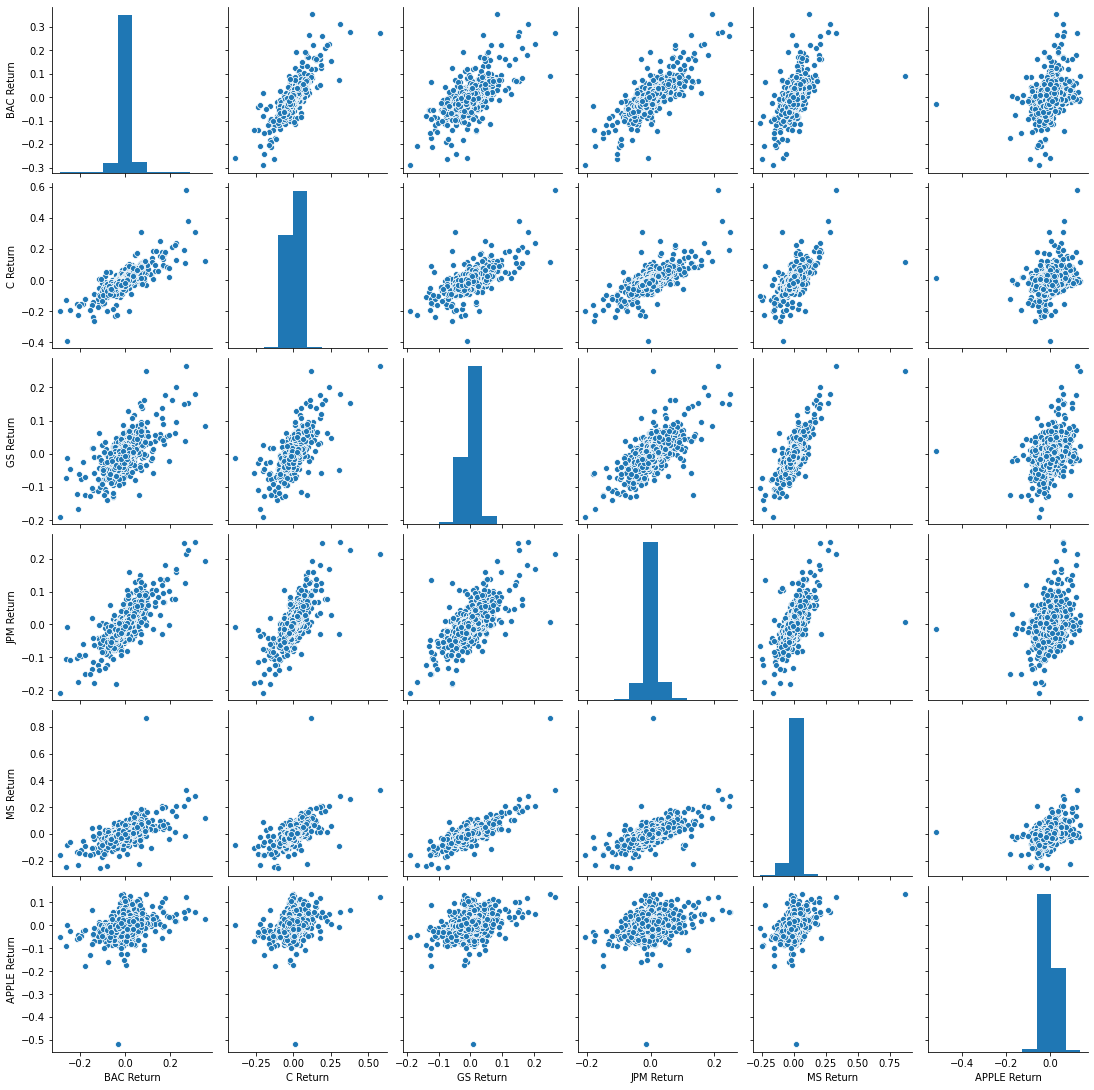

In [ ]:
sns.pairplot(returns[1:])

In [ ]:
returns.idxmin()

BAC Return     2009-01-20
C Return       2009-02-27
GS Return      2009-01-20
JPM Return     2009-01-20
MS Return      2008-10-09
APPLE Return   2000-09-29
dtype: datetime64[ns]

**On the above dates each institue stock had the worst single day returns. We can see that 3 of the banks share the same day for the worst drop, did anything significant happen that day?**

Yes, the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016 probably responsible for that.

In [ ]:
returns.idxmax()

BAC Return     2009-04-09
C Return       2008-11-24
GS Return      2008-11-24
JPM Return     2009-01-21
MS Return      2008-10-13
APPLE Return   2008-10-13
dtype: datetime64[ns]

**On the above dates each bank stock had the best single day returns.**

 We have also noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?

**probably  [Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)**

** Take a look at the standard deviation of the returns, which stock would we can classify as the riskiest over the entire time period?**

In [ ]:
returns.std()

BAC Return      0.029252
C Return        0.031211
GS Return       0.023723
JPM Return      0.024882
MS Return       0.031952
APPLE Return    0.025625
dtype: float64

**we can classify Citigroup as the riskiest over the entire time period.**

Same analysis for 2020.

In [ ]:
returns.loc['2020-01-01':'2020-07-31'].std()

BAC Return      0.044363
C Return        0.051943
GS Return       0.040377
JPM Return      0.041069
MS Return       0.044315
APPLE Return    0.032502
dtype: float64

** Distribution of the 2020 returns for Morgan Stanley **

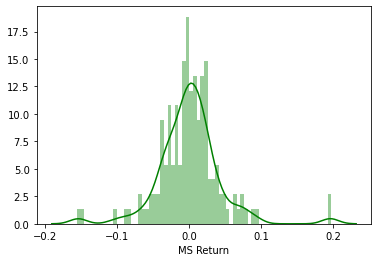

In [ ]:
sns.distplot(returns.loc['2020-01-01':'2020-07-31']['MS Return'],color='green',bins=70)

Distribution of the 2020 returns for Citigroup 

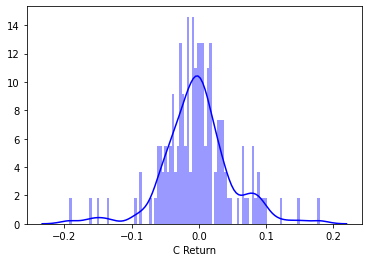

In [ ]:
sns.distplot(returns.loc['2020-01-01':'2020-07-31']['C Return'],color='Blue',bins=100)

Distribution of the 2020 returns for Bank of America

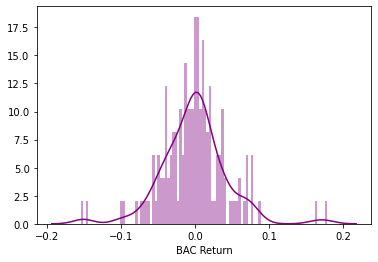

In [ ]:
sns.distplot(returns.loc['2020-01-01':'2020-07-31']['BAC Return'],color='Purple',bins=100)

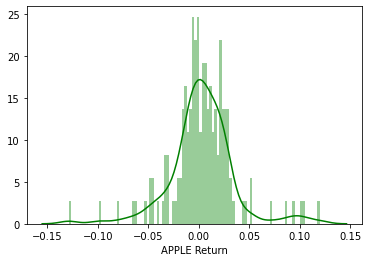

In [ ]:
sns.distplot(returns.loc['2020-01-01':'2020-07-31']['APPLE Return'],color='Green',bins=100)

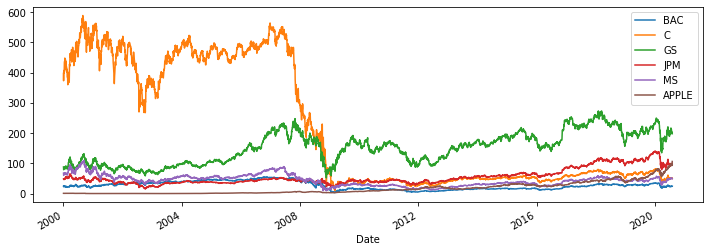

In [ ]:
for name in keys:
    bank_stocks[name]['Close'].plot(figsize=(12,4),label=name)
plt.legend()

##  line plot showing Close price for each bank for the entire index of time

In [ ]:
configure_plotly_browser_state()
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

### **We can noticed a drastical decline for all the institue at early 200. That probale reason is [Covid-19.](https://en.wikipedia.org/wiki/Coronavirus_disease_2019)**

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2019 and 2020. 

** The rolling 30 day average against the Close Price for Bank Of America's stock for the year 2019 and 2020**

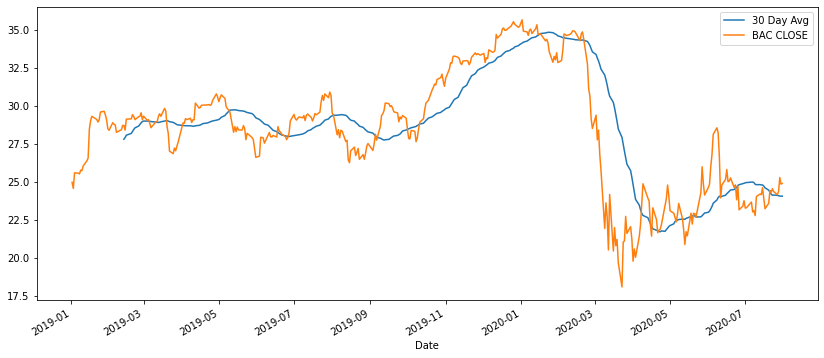

In [ ]:
plt.figure(figsize=(14,6))
BAC['Close'].loc['2019-01-01':'2020-07-31'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2019-01-01':'2020-07-31'].plot(label='BAC CLOSE')
plt.legend()

The rolling 7 day average against the Close Price for Bank Of America's stock for the year 2019 and 2020

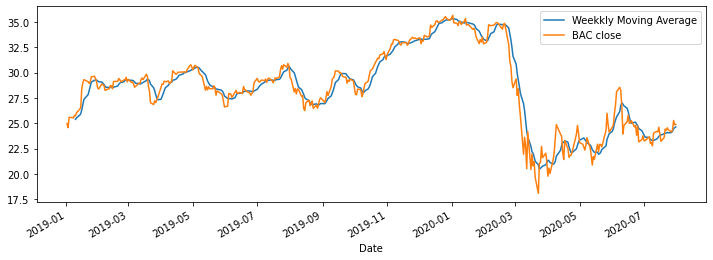

In [ ]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2019-01-01':'2020-07-31'].rolling(window=7).mean().plot(label="Weekkly Moving Average")
BAC['Close'].loc['2019-01-01':'2020-07-31'].plot(label="BAC close")
plt.legend()

**Heatmap of the correlation between the stocks Close Price**

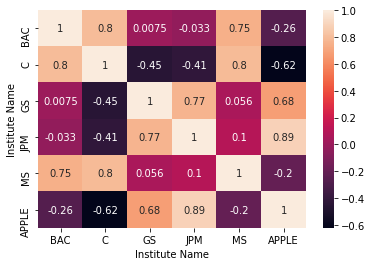

In [ ]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Interactive plot

In [ ]:
cuf=bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
configure_plotly_browser_state()
cuf.iplot(kind='heatmap',colorscale='rdylbu')

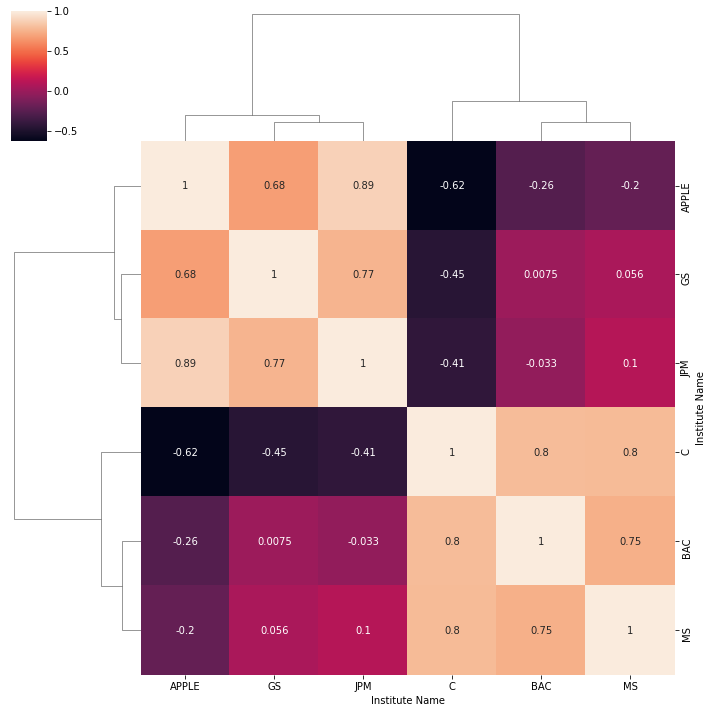

In [ ]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**candle plot of Bank of America's stock from Jan 1st 2019 to August 31st 2020.**

In [ ]:
configure_plotly_browser_state()
BAC[['Open', 'High', 'Low', 'Close']].loc['2019-01-01':'2020-07-31'].iplot(kind='candle')


**Simple Moving Averages plot of Morgan Stanley for the year 2019 and 2020.**

In [ ]:
configure_plotly_browser_state()
MS['Close'].loc['2019-01-01':'2020-07-31'].ta_plot(study='sma',periods=[14,30,60],title='Simple Moving Averages')

**Bollinger Band Plot for Bank of America for the year 2019 and 2020.**

In [ ]:
configure_plotly_browser_state()
BAC['Close'].loc['2019-01-01':'2020-07-31'].ta_plot(study='boll')


**candle plot of Apple's stock from Jan 1st 2019 to August 31st 2020.**

In [ ]:
configure_plotly_browser_state()
APPL[['Open', 'High', 'Low', 'Close']].loc['2019-01-01':'2020-07-31'].iplot(kind='candle')

**Simple Moving Averages plot of Apple for the year 2019 and 2020.**

In [ ]:
configure_plotly_browser_state()
APPL['Close'].loc['2019-01-01':'2020-07-31'].ta_plot(study='sma',periods=[14,30,60],title='Simple Moving Averages')

# **Build stock price prdiction model using LSTM for APPLE Inc.**

In [14]:
data=APPL.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1)
data.to_csv('data.csv',sep=',')

In [15]:
data.head()

Close
Date                
2000-01-03  0.999442
2000-01-04  0.915179
2000-01-05  0.928571
2000-01-06  0.848214
2000-01-07  0.888393

No handles with labels found to put in legend.


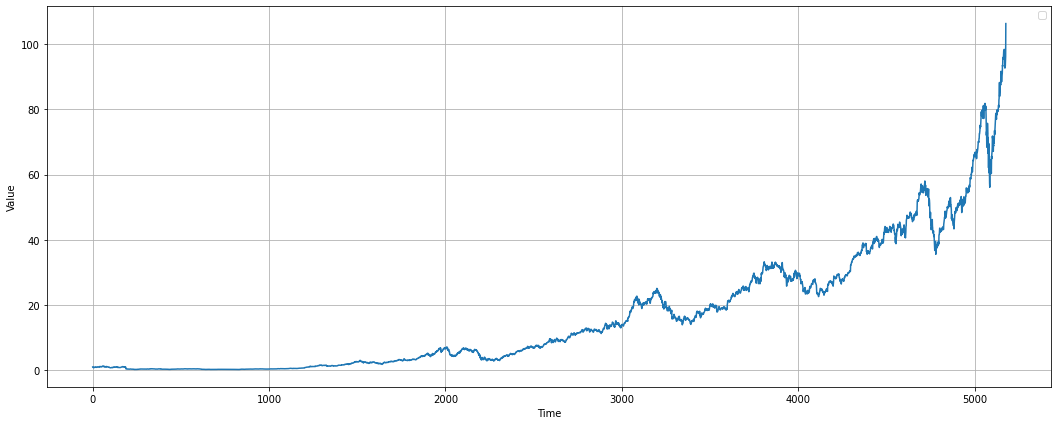

In [16]:
import csv
time_step = []
price = []
temp=0
with open('data.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    price.append(float(row[1]))
    time_step.append(temp)
    temp+=1

series = np.array(price)
time = np.array(time_step)
plt.figure(figsize=(18, 7))
plot_series(time, series)

In [17]:
#We are going to take 10% data as our validation data
test_ind =  len(data)-int(len(data)*10/100)
time_train = time[:test_ind]
x_train = series[:test_ind]
time_valid = time[test_ind:]
x_valid = series[test_ind:]
window_size = 18
batch_size = 32
shuffle_buffer_size = 1000

In [18]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=18, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(100, return_sequences=True),
  tf.keras.layers.LSTM(100, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 11ms/step - loss: 2.5304 - mae: 2.9661
Epoch 2/100
47/47 [==============================] - 1s 11ms/step - loss: 2.7137 - mae: 3.1671
Epoch 3/100
47/47 [==============================] - 1s 11ms/step - loss: 1.4254 - mae: 1.8476
Epoch 4/100
47/47 [==============================] - 1s 11ms/step - loss: 1.2206 - mae: 1.6189
Epoch 5/100
47/47 [==============================] - 1s 11ms/step - loss: 0.9569 - mae: 1.3171
Epoch 6/100
47/47 [==============================] - 1s 12ms/step - loss: 0.8963 - mae: 1.2590
Epoch 7/100
47/47 [==============================] - 1s 11ms/step - loss: 1.0066 - mae: 1.4068
Epoch 8/100
47/47 [==============================] - 1s 11ms/step - loss: 0.8875 - mae: 1.2645
Epoch 9/100
47/47 [==============================] - 1s 12ms/step - loss: 0.6872 - mae: 1.0220
Epoch 10/100
47/47 [==============================] - 1s 11ms/step - loss: 0.7365 - mae: 1.0888
Epoch 11/100
47/47 [=============================

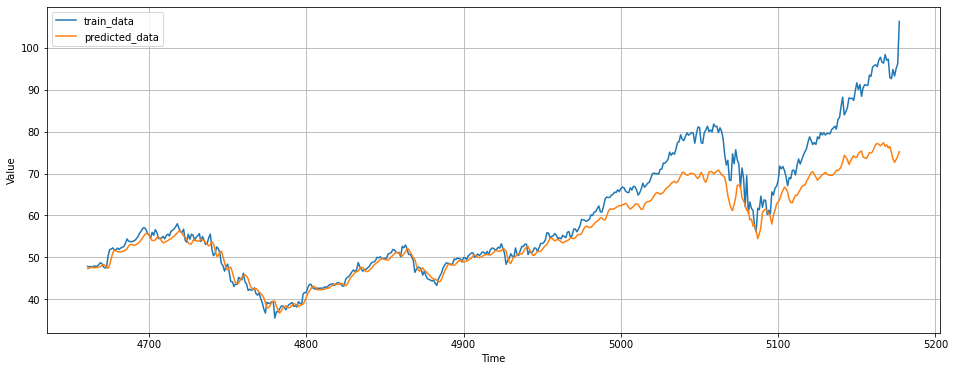

In [21]:
apple_forecast = os_model_forecast(model, series[..., np.newaxis], window_size)
apple_forecast = apple_forecast[test_ind - window_size:-1, -1, 0]
plt.figure(figsize=(16, 6))
plot_series(time_valid, x_valid,label='train_data')
plot_series(time_valid, apple_forecast,label='predicted_data')


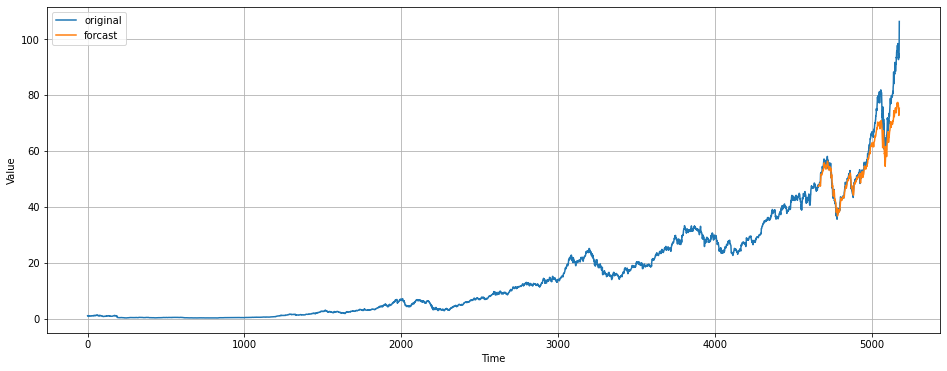

In [22]:
plt.figure(figsize=(16, 6))
plot_series(time,series,label='original')
plot_series(time_valid, apple_forecast,label='forcast')

**This prediction is reasonable since the earlier prediction the price prediction was good. However the later prediction was not very good since we can see a very sharp decrease and very sharp increase.**